<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Principal Component Analysis</a></span><ul class="toc-item"><li><span><a href="#Application-1:-Diamonds" data-toc-modified-id="Application-1:-Diamonds-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Application 1: Diamonds</a></span><ul class="toc-item"><li><span><a href="#Etapa-1:-Carregar-e-transformar-os-Dados" data-toc-modified-id="Etapa-1:-Carregar-e-transformar-os-Dados-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Etapa 1: Carregar e transformar os Dados</a></span></li><li><span><a href="#Etapa-2:-Normalizar-os-dados" data-toc-modified-id="Etapa-2:-Normalizar-os-dados-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Etapa 2: Normalizar os dados</a></span></li><li><span><a href="#Etapa-3:-PCA-Projection-to-2D" data-toc-modified-id="Etapa-3:-PCA-Projection-to-2D-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Etapa 3: PCA Projection to 2D</a></span></li><li><span><a href="#Etapa-4:-Análise" data-toc-modified-id="Etapa-4:-Análise-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Etapa 4: Análise</a></span><ul class="toc-item"><li><span><a href="#Visualização-de-dados" data-toc-modified-id="Visualização-de-dados-1.1.4.1"><span class="toc-item-num">1.1.4.1&nbsp;&nbsp;</span>Visualização de dados</a></span></li><li><span><a href="#Variância-Explicada" data-toc-modified-id="Variância-Explicada-1.1.4.2"><span class="toc-item-num">1.1.4.2&nbsp;&nbsp;</span>Variância Explicada</a></span></li><li><span><a href="#Análise-dos-Loadings" data-toc-modified-id="Análise-dos-Loadings-1.1.4.3"><span class="toc-item-num">1.1.4.3&nbsp;&nbsp;</span>Análise dos Loadings</a></span></li></ul></li></ul></li><li><span><a href="#Application-2:-Simulation" data-toc-modified-id="Application-2:-Simulation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Application 2: Simulation</a></span><ul class="toc-item"><li><span><a href="#Simulando-os-dados" data-toc-modified-id="Simulando-os-dados-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Simulando os dados</a></span></li><li><span><a href="#Modelando" data-toc-modified-id="Modelando-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Modelando</a></span></li><li><span><a href="#O-que-está-acontecendo?" data-toc-modified-id="O-que-está-acontecendo?-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>O que está acontecendo?</a></span></li></ul></li></ul></li><li><span><a href="#Voltamos-em-15m---21h27" data-toc-modified-id="Voltamos-em-15m---21h27-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Voltamos em 15m - 21h27</a></span><ul class="toc-item"><li><span><a href="#Application-3:-NLP" data-toc-modified-id="Application-3:-NLP-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Application 3: NLP</a></span><ul class="toc-item"><li><span><a href="#Carregando-dados" data-toc-modified-id="Carregando-dados-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Carregando dados</a></span></li><li><span><a href="#Conhecendo-o-CountVectorizer" data-toc-modified-id="Conhecendo-o-CountVectorizer-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Conhecendo o CountVectorizer</a></span></li><li><span><a href="#Reduzindo-o-vocabulário" data-toc-modified-id="Reduzindo-o-vocabulário-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Reduzindo o vocabulário</a></span></li><li><span><a href="#Modelando" data-toc-modified-id="Modelando-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Modelando</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import psycopg2, random
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

# Principal Component Analysis 
PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.

In [2]:
def simular_dado_mv_x(parametros_x1, parametros_x2, samples):
    x1 = np.random.normal(loc=parametros_x1[0],
                          scale=parametros_x1[1],
                          size=samples)
    x2 = x1 + np.random.normal(loc=parametros_x2[0], 
                               scale=parametros_x2[1], 
                               size=samples)
    return pd.DataFrame({'x1': x1, 'x2': x2,})

In [3]:
from sklearn.preprocessing import StandardScaler


In [4]:
tb_simul_x = simular_dado_mv_x((0, 5), (0, 1), 100)

In [6]:
tb_simul_x.head()

,x1,x2
0,3.811229,3.240363
1,2.128557,2.728708
2,-10.434461,-8.930539
3,3.285190,3.434556
4,1.425947,1.123354


<AxesSubplot:xlabel='x1', ylabel='x2'>

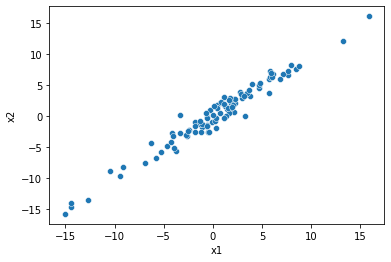

In [7]:
sns.scatterplot(data = tb_simul_x, x = 'x1', y = 'x2')

In [8]:
norm = StandardScaler().fit(tb_simul_x)
X_norm = norm.transform(tb_simul_x)

In [9]:
from sklearn.decomposition import PCA

pca_t = PCA(n_components = 2)
pca_t.fit(X_norm)
pca_X_norm = pca_t.transform(X_norm)

In [10]:
pca_X_norm[0:5,:]

array([[-0.84357999, -0.07902635],
       [-0.54702276,  0.08012366],
       [ 2.71972694,  0.21573394],
       [-0.7984238 ,  0.01828116],
       [-0.23631892, -0.0402969 ]])

In [11]:
tb_pca_x = pd.DataFrame(pca_X_norm, columns = ['PC1', 'PC2'])
tb_full_x = pd.concat([tb_pca_x, tb_simul_x], axis = 1)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

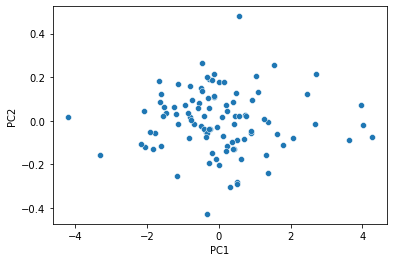

In [12]:
sns.scatterplot(data = tb_full_x, x = 'PC1', y = 'PC2')

<AxesSubplot:xlabel='x1', ylabel='x2'>

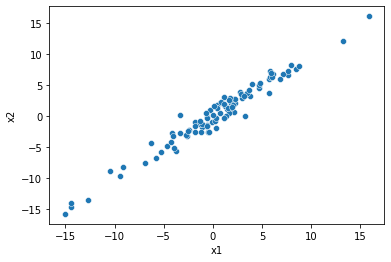

In [13]:
sns.scatterplot(data = tb_simul_x, x = 'x1', y = 'x2')

In [14]:
loadings = pd.DataFrame(pca_t.components_.T, 
                        columns=['PC1', 'PC2'], 
                        index=tb_simul_x.columns)
loadings

,PC1,PC2
x1,-0.707107,-0.707107
x2,-0.707107,0.707107


## Application 1: Diamonds

### Etapa 1: Carregar e transformar os Dados

In [15]:
def etl_diamonds(diamonds):
    x_0 = diamonds['x'] == 0
    y_0 = diamonds['y'] == 0
    z_0 = diamonds['z'] == 0
    dim_0 = x_0 | y_0 | z_0
    diamonds_c = diamonds[~dim_0].copy()
    print('Linhas na etapa atual:', str(len(diamonds_c)))
    dict_clarity = {
        'I1': 0,
        'SI2': 1,
        'SI1': 2,
        'VS2': 3,
        'VS1': 4,
        'VVS2': 5,
        'VVS1': 6,
        'IF': 7
    }
    diamonds_c['clarity_num'] = diamonds_c['clarity'].map(dict_clarity)
    dict_color = {
        'D': 0,
        'E': 1,
        'F': 2,
        'G': 3,
        'H': 4,
        'I': 5,
        'J': 6,
    }
    diamonds_c['color_num'] = diamonds_c['color'].map(dict_color)
    dict_cut = {
        'Fair': 0,
        'Good': 1,
        'Very Good': 2,
        'Premium': 3,
        'Ideal': 4,
    }
    diamonds_c['cut_num'] = diamonds_c['cut'].map(dict_cut)
    diamonds_c['volume'] = diamonds_c['x'] * diamonds_c['y'] * diamonds_c['z']
    diamonds_c['price_k'] = diamonds_c['price']/diamonds_c['carat']
    diamonds_c['density'] = diamonds_c['carat']/diamonds_c['volume']
    pricek_inf = np.quantile(diamonds_c['price_k'], 0.01)
    pricek_sup = np.quantile(diamonds_c['price_k'], 0.99)
    density_inf = np.quantile(diamonds_c['density'], 0.01)
    density_sup = np.quantile(diamonds_c['density'], 0.99)
    pricek_in = (pricek_inf < diamonds_c['price_k']) &  (diamonds_c['price_k'] < pricek_sup)
    density_in = (density_inf < diamonds_c['density']) &  (diamonds_c['density'] < density_sup)
    diamonds_c = diamonds_c[pricek_in & density_in].copy()
    
    diamonds_c['log_carat'] = np.log(diamonds_c['carat'])
    diamonds_c['log_price'] = np.log(diamonds_c['price'])
    diamonds_c = diamonds_c.drop(['cut', 'color', 'price', 'clarity', 'price_k', 'density', 'carat', 'clarity'],
                                axis = 1)
    return diamonds_c

In [16]:
diamonds = pd.read_csv('data/tb_diamantes.csv')
diamonds_c = etl_diamonds(diamonds)
diamonds_c.columns

Linhas na etapa atual: 48922


Index(['depth', 'table', 'x', 'y', 'z', 'clarity_num', 'color_num', 'cut_num',
       'volume', 'log_carat', 'log_price'],
      dtype='object')

In [17]:
diamonds_c.head()

,depth,table,x,y,z,clarity_num,color_num,cut_num,volume,log_carat,log_price
0,59.8,61.0,3.89,3.84,2.31,2,1,3,34.505856,-1.560648,5.786897
1,56.9,65.0,4.05,4.07,2.31,4,1,1,38.076885,-1.469676,5.789960
7,59.4,61.0,4.00,4.05,2.39,4,4,2,38.718000,-1.469676,5.823046
9,62.8,56.0,3.93,3.90,2.46,4,6,4,37.704420,-1.469676,5.828946
10,60.4,61.0,3.88,3.84,2.33,2,2,3,34.715136,-1.514128,5.834811


### Etapa 2: Normalizar os dados

In [18]:
X = diamonds_c[['depth', 'table', 'x', 'y', 'z', 'clarity_num', 'color_num',
       'cut_num', 'volume', 'log_carat']]
norm = StandardScaler().fit(X)
X_norm = norm.transform(X)

In [19]:
X_norm.shape

(46973, 10)

In [20]:
diamonds_c_norm = np.append(X_norm, diamonds_c[['log_price']].to_numpy(), axis = 1)

In [22]:
diamonds_c_norm.shape

(46973, 11)

In [23]:
tb_diamonds_norm = pd.DataFrame(diamonds_c_norm,
                            columns=diamonds_c.columns)

In [24]:
tb_diamonds_norm.head()

,depth,table,x,y,z,clarity_num,color_num,cut_num,volume,log_carat,log_price
0,-1.420577,1.612372,-1.650208,-1.708433,-1.786664,-0.644449,-0.939160,0.065067,-1.246642,-2.004405,5.786897
1,-3.545759,3.423953,-1.506707,-1.500763,-1.786664,0.584285,-0.939160,-1.759647,-1.199821,-1.847851,5.789960
2,-1.713705,1.612372,-1.551551,-1.518821,-1.670248,0.584285,0.831751,-0.847290,-1.191415,-1.847851,5.823046
3,0.777888,-0.652106,-1.614333,-1.654258,-1.568383,0.584285,2.012357,0.977424,-1.204704,-1.847851,5.828946
4,-0.980884,1.612372,-1.659177,-1.708433,-1.757560,-0.644449,-0.348856,0.065067,-1.243898,-1.924349,5.834811


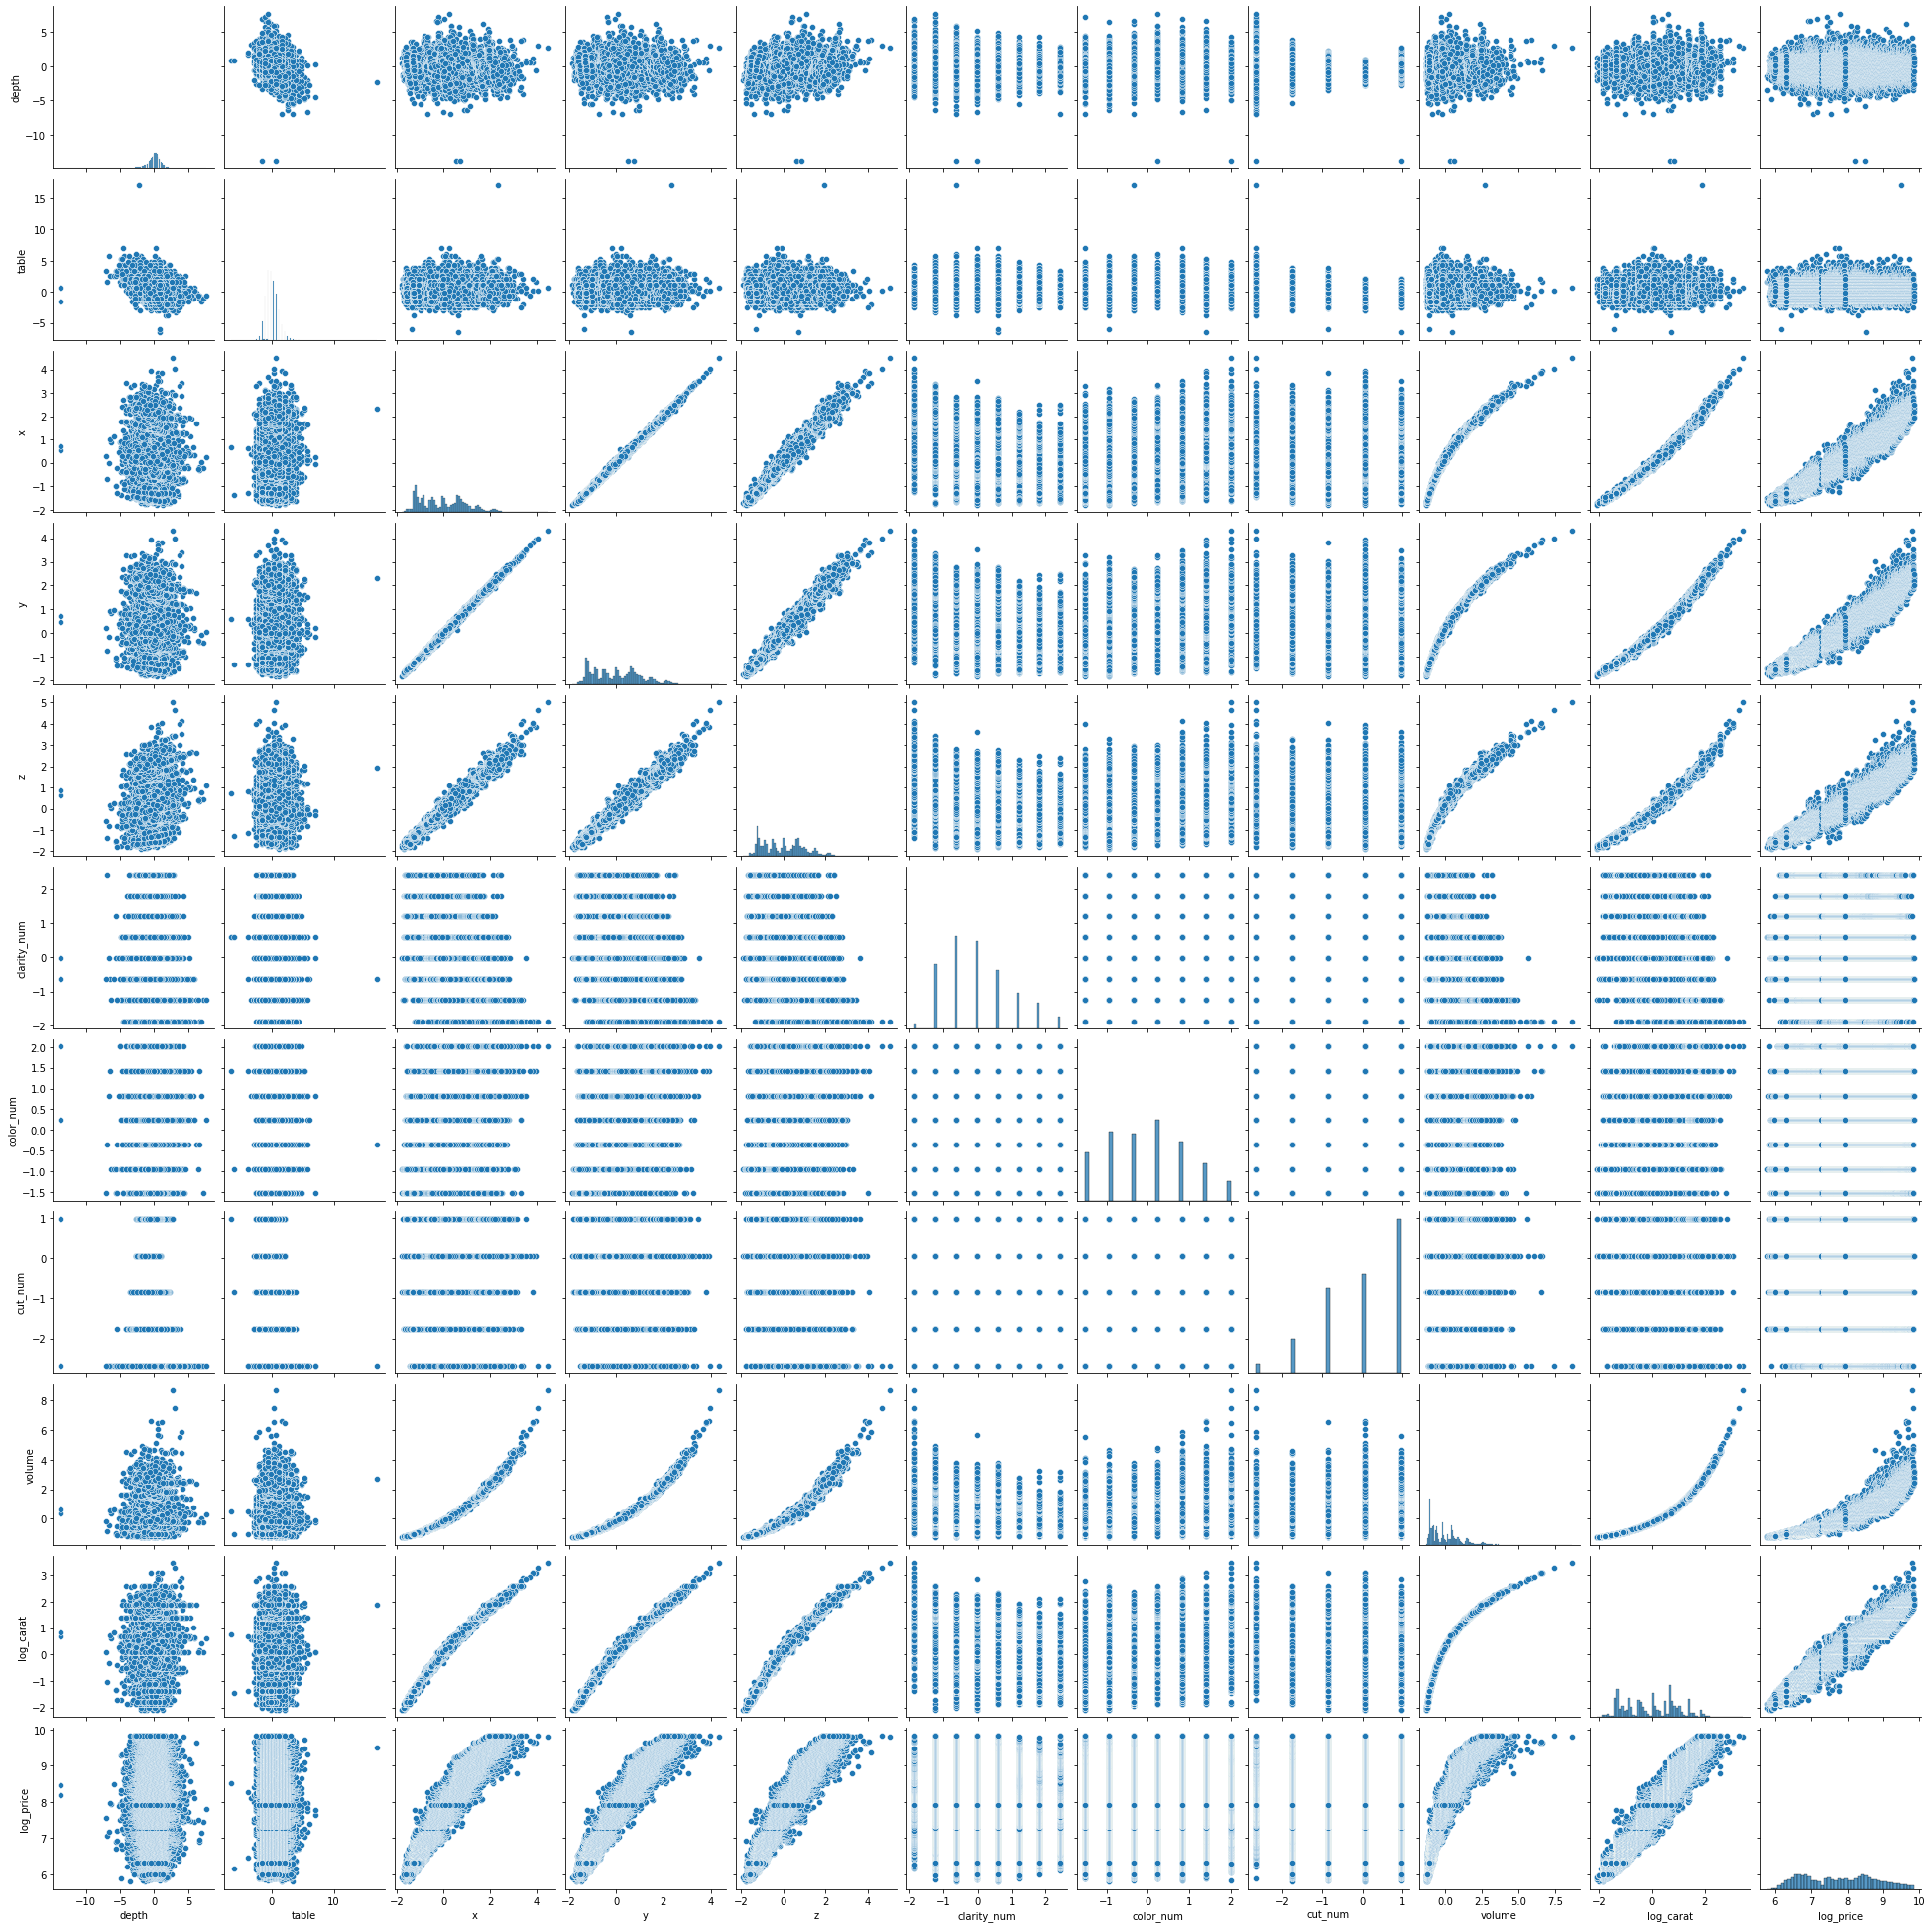

In [25]:
sns.pairplot(tb_diamonds_norm)

### Etapa 3: PCA Projection to 2D
* 4 dimensions -> 2 dimensions
* You lose some of the variance (information) when you do this

In [44]:
X = tb_diamonds_norm.drop('log_price', axis = 1)
pca_t = PCA()
pca_t.fit(X)
pca_X_norm = pca_t.transform(X)

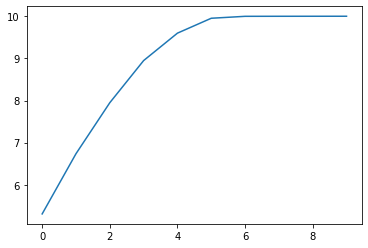

In [47]:
plt.plot(np.cumsum(pca_t.explained_variance_))

In [36]:
tb_pca_diam = pd.DataFrame(pca_X_norm, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
tb_pca_diam['log_price'] = tb_diamonds_norm['log_price']

### Etapa 4: Análise

#### Visualização de dados

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

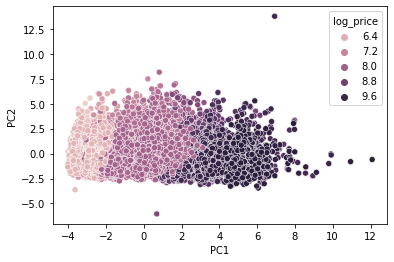

In [37]:
sns.scatterplot(data = tb_pca_diam, x = 'PC1', y = 'PC2', hue = 'log_price')

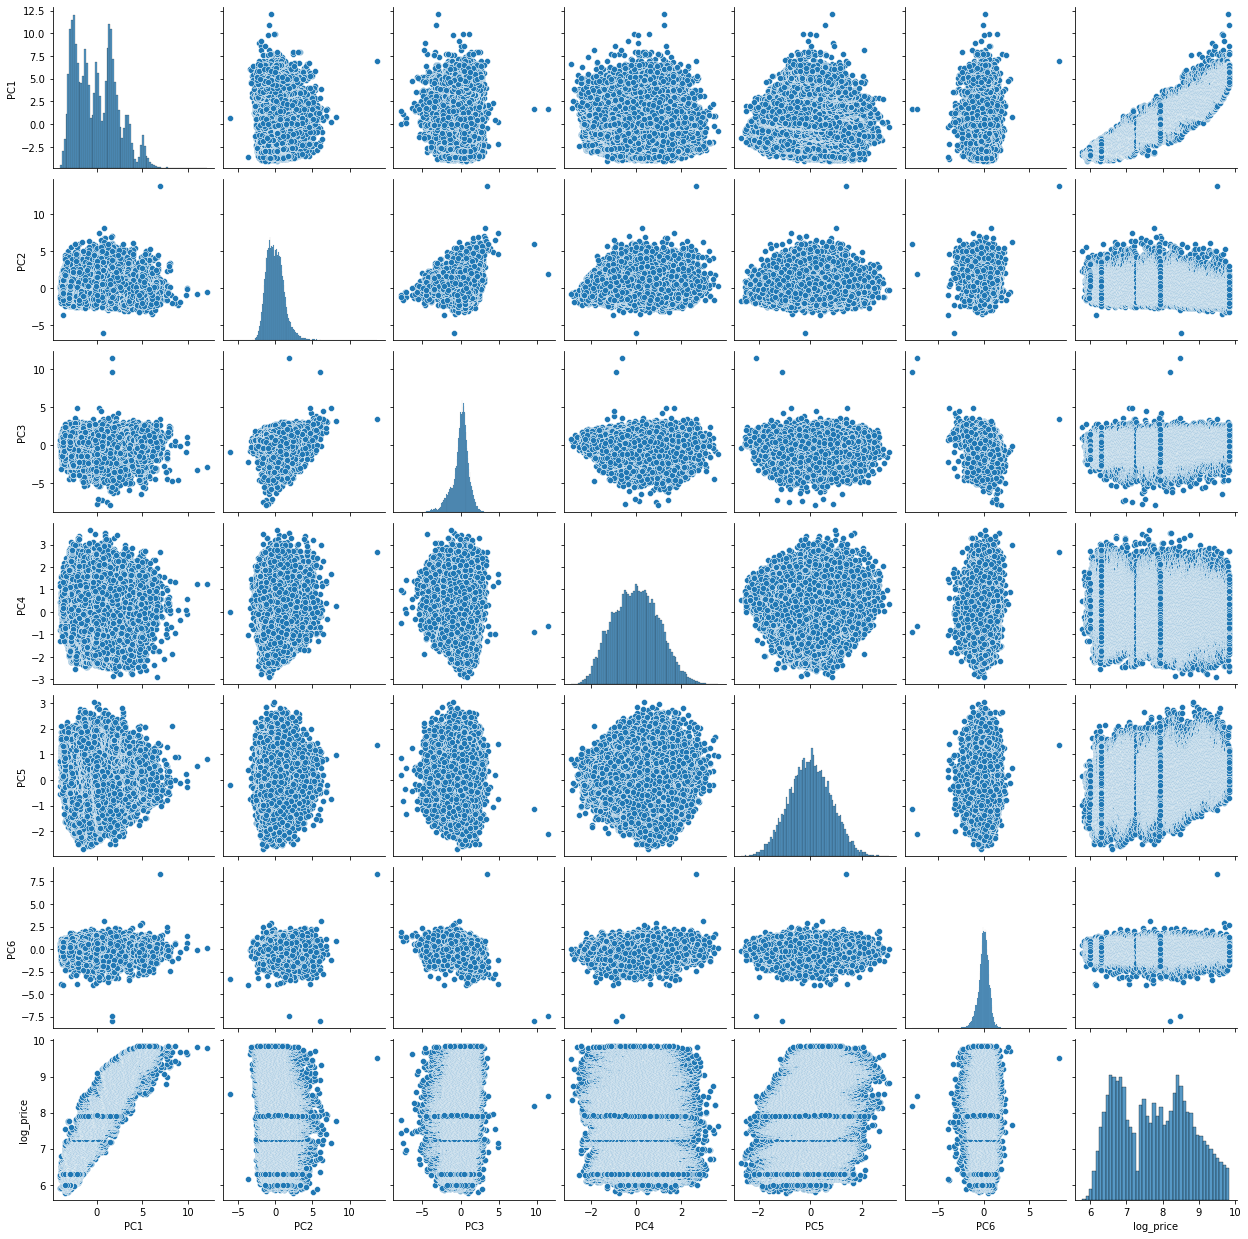

In [38]:
sns.pairplot(tb_pca_diam)

#### Variância Explicada

In [39]:
pca_t.explained_variance_ratio_

array([0.53080097, 0.14289458, 0.1210842 , 0.09998182, 0.06511491,
       0.03535347])

In [40]:
sum(pca_t.explained_variance_ratio_)

0.9952299446817625

In [32]:
2/(len(tb_diamonds_norm.columns) - 1)

0.2

#### Análise dos Loadings

In [33]:
loadings = pd.DataFrame(pca_t.components_.T, 
                        columns=['PC1', 'PC2'], 
                        index=X.columns)
loadings

,PC1,PC2
depth,-0.000008,-0.299624
table,0.107066,0.712245
x,0.430407,-0.050062
y,0.430051,-0.052808
z,0.429295,-0.086868
clarity_num,-0.204794,-0.191783
color_num,0.147203,-0.197415
cut_num,-0.087776,-0.553309
volume,0.423287,-0.074722
log_carat,0.428443,-0.051033


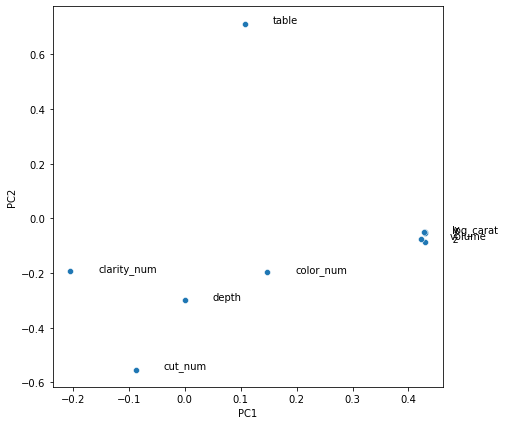

In [34]:
plt.figure(figsize = (7,7))
p1 = sns.scatterplot(data=loadings, x='PC1', y='PC2')
for line in range(0, loadings.shape[0]):
    p1.text(loadings.iloc[line, 0] + 0.05,
            loadings.iloc[line, 1],
            loadings.index[line],
            horizontalalignment='left',
            size='medium',
            color='black')

## Application 2: Simulation

The PCA algorithm will try to find the directions in which the most information is contained. By information, we always mean to say - variance.

Rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between your features (your `X`).

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.

### Simulando os dados

In [48]:
def simular_dado_mv(parametros_x1, parametros_x2, desvpad_E, samples):
    x1 = np.random.normal(loc=parametros_x1[0],
                          scale=parametros_x1[1],
                          size=samples)
    x2 = x1 + np.random.normal(loc=parametros_x2[0], 
                               scale=parametros_x2[1], 
                               size=samples)
    E = np.random.normal(loc=0, scale=desvpad_E, size=samples)
    y = parametros_x1[2] * x1 + parametros_x2[2] * x2 + E
    x3 = (desvpad_E/2)*y + np.random.normal(loc = 0, scale = desvpad_E * 3, size = samples)
    return pd.DataFrame({'y': y, 'x1': x1, 'x2': x2, 'x3' : x3})

In [49]:
tb_sim = simular_dado_mv((0, 10, 2), (0, 5, -2), 4, 100)

In [50]:
tb_sim.head()

,y,x1,x2,x3
0,-2.676654,13.402864,16.848971,-10.294352
1,-13.776757,17.220758,21.546573,-55.468469
2,10.120996,-10.399544,-13.277838,33.368319
3,-5.537777,18.359622,21.999587,-4.943289
4,2.744119,-4.464074,-5.579224,-6.835254


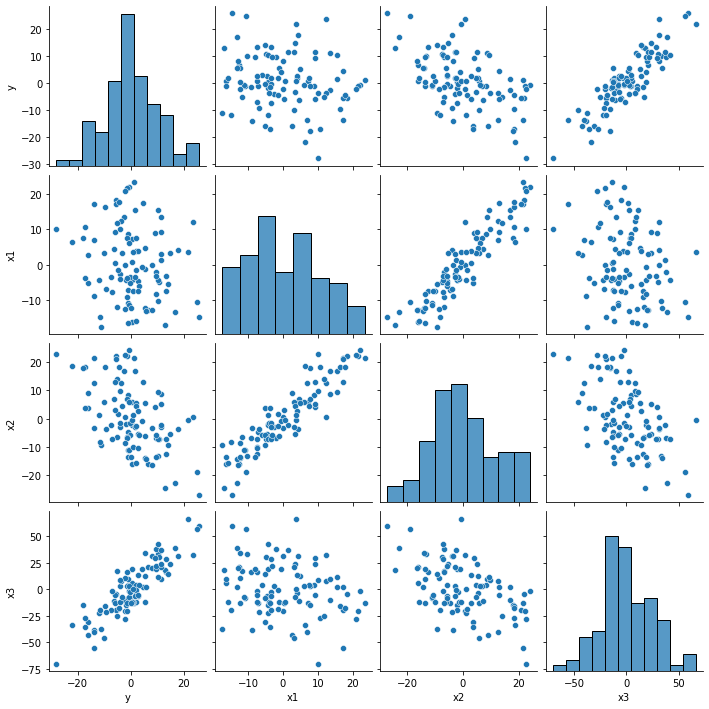

In [51]:
sns.pairplot(tb_sim)

### Modelando

In [54]:
import statsmodels.api as sm

In [56]:
X = sm.add_constant(tb_sim[['x3']])
Y = tb_sim['y']
reg = sm.OLS(Y, X)
lm_fit_x3 = reg.fit()
print("RMSE: ", str(round(np.std(lm_fit_x3.resid), 2)))

RMSE:  4.79


In [57]:
X = sm.add_constant(tb_sim[['x1', 'x2']])
Y = tb_sim['y']
reg = sm.OLS(Y, X)
lm_fit_x12 = reg.fit()
print("RMSE: ", str(round(np.std(lm_fit_x12.resid), 2)))

RMSE:  3.54


### O que está acontecendo?

In [58]:
lm_fit_x12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     339.0
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           1.69e-44
Time:                        20:29:13   Log-Likelihood:                -268.24
No. Observations:                 100   AIC:                             542.5
Df Residuals:                      97   BIC:                             550.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4399      0.360      1.224      0.224      -0.274       1.153
x1             1.9166      0.089     21.601      0.000       1.740       2.093
x2            -1.9896      0.078    -25.570      0.000      -2.144      -1.835
==============================================================================
Omnibus:                        5.483   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.046
Skew:                           0.414   Prob(JB):                       0.0802
Kurtosis:                       3.724   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
norm = StandardScaler().fit(tb_sim[['x1', 'x2']])
pca_t = PCA(n_components = 2)
pca_t.fit(norm.transform(tb_sim[['x1', 'x2']]))

PCA(n_components=2)

In [61]:
np.cumsum(pca_t.explained_variance_)

array([1.93952736, 2.02020202])

In [62]:
loadings = pd.DataFrame(pca_t.components_.T)
loadings

,0,1
0,0.707107,0.707107
1,0.707107,-0.707107


# Voltamos em 15m - 21h27

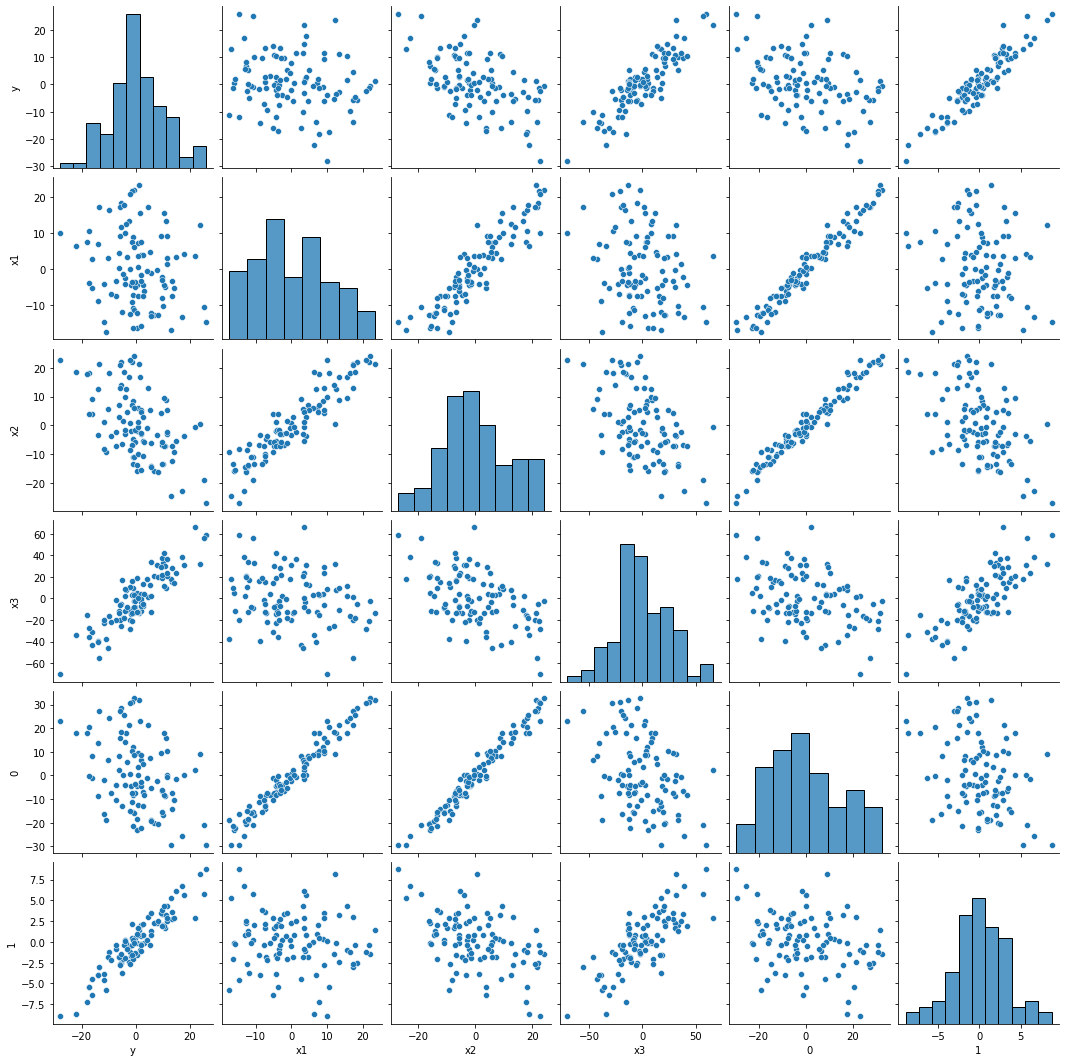

In [63]:
X_pca = pd.DataFrame(pca_t.transform(tb_sim[['x1', 'x2']]))
tb_sim_pca = pd.concat([tb_sim, X_pca], axis = 1)
sns.pairplot(tb_sim_pca)

## Application 3: NLP

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

### Carregando dados

In [65]:
food = pd.read_csv('data/Food Composition.csv')

In [66]:
food.head()

,Public Food Key,Food Profile ID,Derivation,Food Name,Food Description,Sampling Details,Nitrogen Factor,Fat Factor,Specific Gravity,Analysed Portion,Unanalysed Portion,Classification,Classification Name
0,F002258,14723,Borrowed,"Cardamom seed, dried, ground",Ground spice commonly used in Indian cooking a...,The majority of nutrient data were borrowed fr...,6.25,0.96,0.0,100%,0%,31302,Herbs(dried) and spices
1,F002963,14718,Borrowed,"Cinnamon, dried, ground",Dried and ground bark or quills of Cinnamomum ...,The majority of nutrient data were borrowed fr...,6.25,0.96,0.0,100%,0%,31302,Herbs(dried) and spices
2,F002970,14725,Borrowed,"Cloves, dried, ground","Dried and ground, unopened flower buds of Syzy...",The majority of nutrient data were borrowed fr...,6.25,0.96,0.0,100%,0%,31302,Herbs(dried) and spices
3,F003190,14727,Borrowed,"Coriander seed, dried, ground",Dried and ground fruit or seed of Coriandrum s...,The majority of nutrient data were borrowed fr...,6.25,0.96,0.0,100%,0%,31302,Herbs(dried) and spices
4,F003327,14728,Borrowed,"Cumin (cummin) seed, dried, ground",Dried and ground fruit or seeds of Cuminum cym...,The majority of nutrient data were borrowed fr...,6.25,0.96,0.0,100%,0%,31302,Herbs(dried) and spices


In [67]:
food['text'] = food['Food Name'] + " " + food['Food Description']

### Conhecendo o CountVectorizer

In [102]:
ck = CountVectorizer(stop_words = 'english')
ck_fit = ck.fit_transform(food['text'])
X = ck_fit.toarray()

In [103]:
X.shape

(1538, 2094)

In [104]:
30/2094

0.014326647564469915

### Reduzindo o vocabulário

In [107]:
norm = StandardScaler().fit(X)
pca_t = PCA(n_components = 30)
pca_t.fit(norm.transform(X))

PCA(n_components=30)

In [85]:
np.cumsum(pca_t.explained_variance_ratio_)

array([0.00844023, 0.01527159, 0.02180098, 0.02731273, 0.03261218,
       0.03784511, 0.04292635, 0.047731  , 0.05245711, 0.05715747,
       0.061801  , 0.06639704, 0.07093531, 0.07534029, 0.07973744,
       0.08408275, 0.08830484, 0.09249815, 0.09658218, 0.10060735,
       0.10460527, 0.10848334, 0.11229597, 0.11608951, 0.11984198,
       0.12354279, 0.12719508, 0.13083989, 0.1344391 , 0.13797963])

In [89]:
loadings = pd.DataFrame(pca_t.components_.T, 
                        index=ck.get_feature_names())
loadings.sort_values(3, ascending = False).head(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
typical,0.039467,-0.019593,0.004871,0.135936,-0.004752,-0.050461,-0.039865,-0.018671,0.100383,-0.040865,...,-0.000098,0.022534,0.021117,-0.033060,-0.002528,0.007234,-0.010402,0.009963,0.015755,-0.003078
pies,0.025022,-0.022660,0.002885,0.135279,-0.036349,-0.059080,-0.030277,-0.024673,0.201171,-0.075247,...,-0.016387,-0.003916,-0.009352,-0.010247,0.004060,-0.019623,0.021873,-0.003370,0.013548,0.004716
produces,0.025022,-0.022660,0.002885,0.135279,-0.036349,-0.059080,-0.030277,-0.024673,0.201171,-0.075247,...,-0.016387,-0.003916,-0.009352,-0.010247,0.004060,-0.019623,0.021873,-0.003370,0.013548,0.004716
pastry,0.027056,-0.020989,0.001804,0.133482,-0.035478,-0.056441,-0.025931,-0.022423,0.188052,-0.065226,...,-0.012521,-0.002281,-0.003619,-0.005513,-0.002288,-0.013015,0.011926,-0.000846,0.011860,0.006593
blocks,0.029008,-0.020966,-0.000735,0.130638,-0.021525,-0.050500,-0.032327,-0.012447,0.137252,-0.065424,...,-0.048557,0.005151,-0.066487,-0.004455,0.041704,0.002909,0.016147,0.048122,-0.031464,0.012053
supermarkets,0.025808,-0.022509,0.005721,0.129060,-0.037381,-0.054453,-0.025600,-0.023022,0.188746,-0.070770,...,-0.016303,-0.005231,-0.008146,-0.010044,0.003290,-0.020878,0.020506,-0.002597,0.012111,0.005224
citric,0.026517,-0.020590,0.002619,0.126468,-0.027400,-0.055053,-0.029449,-0.023852,0.168436,-0.065095,...,-0.008496,0.000696,-0.003574,-0.012934,0.001908,-0.011796,0.011121,-0.000559,0.012224,-0.000104
multiple,0.022557,-0.020751,0.002931,0.122495,-0.033203,-0.053565,-0.027464,-0.021112,0.184768,-0.068182,...,-0.015860,-0.006022,-0.009657,-0.008973,0.003287,-0.019565,0.021329,-0.004813,0.012463,0.006196
need,0.022557,-0.020751,0.002931,0.122495,-0.033203,-0.053565,-0.027464,-0.021112,0.184768,-0.068182,...,-0.015860,-0.006022,-0.009657,-0.008973,0.003287,-0.019565,0.021329,-0.004813,0.012463,0.006196
sheets,0.025478,-0.020518,-0.000048,0.121891,-0.032268,-0.055019,-0.027787,-0.022868,0.174232,-0.057647,...,-0.013767,-0.004281,-0.010012,-0.006984,-0.001791,-0.026875,0.005353,0.005871,0.003755,0.013928


### Modelando

<AxesSubplot:xlabel='Fat Factor', ylabel='Count'>

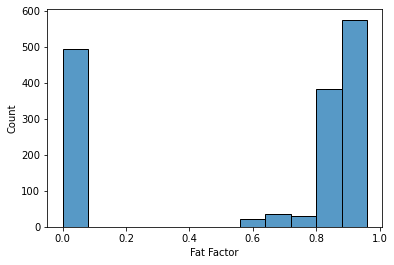

In [92]:
sns.histplot(data = food, x = 'Fat Factor')

In [93]:
X_pca = pd.DataFrame(pca_t.transform(X))
X_pca['fat'] = food['Fat Factor']
fat_pca = X_pca[X_pca['fat'] > 0].copy()

In [94]:
X = sm.add_constant(fat_pca[range(30)])
Y = fat_pca['fat']

In [95]:
reg = sm.OLS(Y, X)
lm_fit = reg.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fat   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     22.99
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           2.00e-93
Time:                        21:00:06   Log-Likelihood:                 1330.7
No. Observations:                1045   AIC:                            -2599.
Df Residuals:                    1014   BIC:                            -2446.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8543      0.003    325.035      0.000       0.849       0.859
0             -0.0169      0.003     -6.772      0.000      -0.022      -0.012
1             -0.0142      0.005     -2.886      0.004      -0.024      -0.005
2              0.0047      0.004      1.111      0.267      -0.004       0.013
3              0.0585      0.005     11.392      0.000       0.048       0.069
4              0.0157      0.006      2.509      0.012       0.003       0.028
5              0.0225      0.009      2.629      0.009       0.006       0.039
6             -0.0002      0.007     -0.029      0.977      -0.013       0.013
7              0.0526      0.009      5.906      0.000       0.035       0.070
8             -0.0210      0.008     -2.720      0.007      -0.036      -0.006
9             -0.0093      0.009     -0.990      0.322      -0.028       0.009
10            -0.0163      0.008     -2.068      0.039      -0.032      -0.001
11            -0.0327      0.012     -2.767      0.006      -0.056      -0.010
12            -0.0106      0.009     -1.149      0.251      -0.029       0.007
13            -0.0016      0.008     -0.186      0.853      -0.018       0.015
14             0.0053      0.010      0.542      0.588      -0.014       0.024
15            -0.0312      0.008     -3.917      0.000      -0.047      -0.016
16             0.0233      0.009      2.534      0.011       0.005       0.041
17            -0.0314      0.010     -3.226      0.001      -0.051      -0.012
18            -0.0004      0.009     -0.041      0.968      -0.018       0.017
19             0.0230      0.008      2.728      0.006       0.006       0.039
20             0.0437      0.009      4.840      0.000       0.026       0.061
21             0.0322      0.011      2.912      0.004       0.011       0.054
22             0.0255      0.011      2.399      0.017       0.005       0.046
23            -0.0016      0.010     -0.161      0.872      -0.021       0.018
24            -0.0481      0.017     -2.862      0.004      -0.081      -0.015
25            -0.0299      0.010     -3.033      0.002      -0.049      -0.011
26             0.0012      0.012      0.100      0.920      -0.022       0.024
27            -0.0124      0.011     -1.117      0.264      -0.034       0.009
28            -0.0525      0.012     -4.353      0.000      -0.076      -0.029
29             0.0131      0.011      1.162      0.246      -0.009       0.035
==============================================================================
Omnibus:                       94.244   Durbin-Watson:                   0.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.838
Skew:                          -0.712   Prob(JB):                     1.05e-28
Kurtosis:                       3.964   Cond. No.                         10.2
==

In [96]:
fat_pca['pred_fat'] = lm_fit.predict()

In [97]:
fat_pca['ape'] = abs(fat_pca['pred_fat'] - fat_pca['fat'])/fat_pca['fat']

In [98]:
np.mean(fat_pca['ape'])

0.06289757762224332

<AxesSubplot:xlabel='ape', ylabel='Count'>

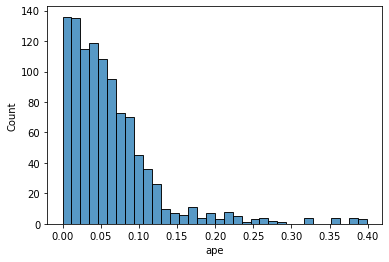

In [99]:
sns.histplot(data = fat_pca, x ='ape')